
* [Kaggle 데이터셋](https://www.kaggle.com/blastchar/telco-customer-churn)은 통신사 고객 이탈(Churn)에 대한 정보를 담고 있습니다. IBM에서 제공한 이 데이터셋은 고객 유지에 필요한 행동을 예측하는 데 사용될 수 있으며, 고객 데이터를 분석하여 고객 유지 프로그램을 개발하는 데 도움이 됩니다.
* 해당 데이터셋은 다음의 정보로 구성되어 있습니다.
    * 고객 인구 통계 정보(Demographic info): 고객의 성별, 연령대, 배우자 및 부양 가족의 유무(Gender, SeniorCitizen, Partner, Dependents) 등에 관한 정보가 포함되어 있습니다.
    * 고객 이탈(Churn) 정보: 서비스를 중단 여부에 대한 정보가 포함되어 있습니다.
    * 서비스 가입 정보(Services subscribed): 고객들이 가입한 서비스들, 예를 들어 전화, 다중 라인, 인터넷, 온라인 보안, 온라인 백업, 장치 보호, 기술 지원, 스트리밍 TV 및 영화( honeService, MultipleLine, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies) 등에 대한 정보가 있습니다.
    * 고객 계정 정보(Customer account info): 고객이 얼마나 오래 서비스를 이용했는지, 계약 유형, 결제 방법, 무페이퍼 청구 여부, 월별 요금, 총 요금 (CustomerID, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Tenure)등의 정보가 담겨 있습니다.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

### 데이터 로드

In [2]:
from google.colab import drive

drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("https://bit.ly/telco-csv", index_col="customerID")
df.shape

(7043, 20)

In [4]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


# EDA



```
범주형
  gender(성별) / SeniorCitizen(연령대) / Partner(배우지 유무) / Dependents(부양가족 유무) / PhoneService(폰서비스) /
  MultipleLines(다중라인) / InternetService(인터넷 서비스) / OnlineSecurity(인터넷 보안) / OnlineBackup(온라인 백업) /
  DeviceProtection(장치 보호) / TechSupport(기술 지원) / StreamingTV(스트리밍 TV) / StreamingMovies(스트리밍 영화) /
  Contract(계약 종류) / PaperlessBilling(무페이퍼 청구 유무) / PaymentMethod(요금 납부 방법)

수치형
  tenure(계약 유지 기간) / MonthlyCharges(월별 요금) / TotalCharges(현재까지 낸 요금 총 합계)

정답
  Churn(해지 여부)

```



In [ ]:
df.info()

# SeniorCitizen는 범주형 변수이므로 문자형으로 변경하기
# TotalCharges는 수치형 변수여야 하는데 object형이므로 수치형으로 변경하기

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

In [5]:
# TotalCharges 수치형으로 변경
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# SeniorCitizen 범주형으로 변경
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str)

In [6]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## (1) 결측치 처리

In [7]:
display(df[df['TotalCharges'].isnull()==True])
df[df['TotalCharges'].isnull()==True].index == df[df['tenure']==0].index

# TotalCharges가 0인 경우를 살펴보면 계약을 해지하지 않은 상태임을 알 수 있음.
# 가입한지 한달이 되지 않은 신규 고객의 데이터로 유추할 수 있을 듯 함.
# 계약 기간이 주로 2년임. 다른 2년 계약 고객들과 비교해보자.

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [8]:
display(df[(df['Contract']=='One year') & (df['tenure']<12) & (df['Churn']=='Yes')]) # 1년 계약자 중에서 중도 해지 존재
display(df[(df['Contract']=='Two year') & (df['tenure']<24) & (df['Churn']=='Yes')]) # 2년 계약자 중에선 중도 해지 존재 X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
4464-JCOLN,Male,0,Yes,Yes,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.85,35.9,Yes
3164-AALRN,Male,0,No,No,5,Yes,No,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Mailed check,70.00,347.4,Yes
2667-WYLWJ,Female,0,Yes,Yes,8,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.75,145.0,Yes
6158-DWPZT,Male,0,Yes,No,9,No,No phone service,DSL,No,No,No,No,No,No,One year,No,Bank transfer (automatic),24.10,259.8,Yes
6598-RFFVI,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,28.3,Yes
3932-CMDTD,Female,0,No,No,4,Yes,No,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,105.65,443.9,Yes
8563-IIOXK,Male,0,Yes,Yes,7,Yes,No,DSL,Yes,No,No,No,No,No,One year,Yes,Electronic check,49.75,331.3,Yes
4905-JEFDW,Male,0,No,No,11,No,No phone service,DSL,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,41.60,470.6,Yes


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,


In [9]:
# 2년 계약자 중에선 중도 해지 고객이 존재하지 않고 1년 계약 고객이 중도해지 하는 경우 또한 적으므로
# 해당 결측치는 신규 고객의 데이터로 보고 tenure는 1개월, TotalCharges는 월 요금으로 채워주도록 한다.

null_list = df[df['TotalCharges'].isnull()==True].index.tolist()

for i in null_list:
  df.loc[i, 'TotalCharges'] = df.loc[i, 'MonthlyCharges']
  df.loc[i, 'tenure'] = 1

In [10]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.372710,64.761692,2279.798992
std,24.557454,30.090047,2266.730170
min,1.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


## (2) 시각화

### 수치형 변수(1)

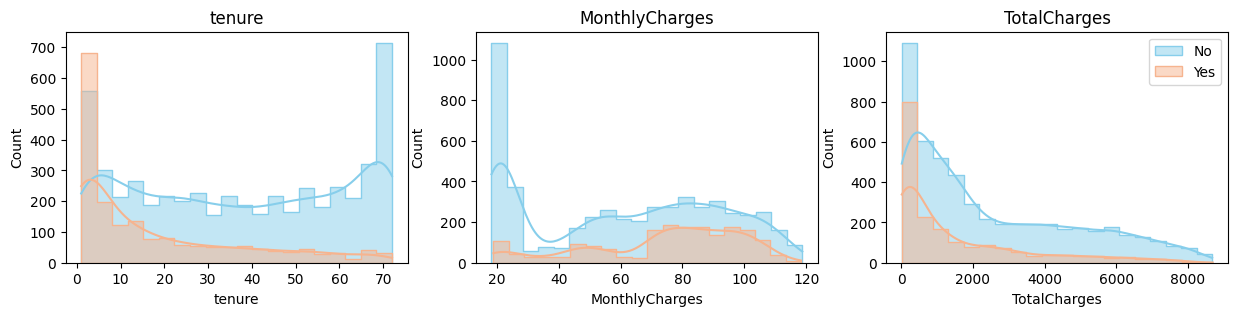

In [11]:
col_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_no = df[df['Churn']=='No']
df_yes = df[df['Churn']=='Yes']

color = sns.color_palette("rocket") # 색상 팔레트 가져오기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

for i, col_name in enumerate(col_list):
  sns.histplot(df_no[col_name], ax=axes[i], color='Skyblue',
               label='No', bins=20, kde=True, element="step")
  sns.histplot(df_yes[col_name], ax=axes[i], color=color[5],
               label='Yes', bins=20, kde=True, element="step")
  axes[i].set_title(col_name) # 각 그래프마다 제목 달기

plt.legend() # 범례표시

#### Think

tenure: 이탈 고객들은 초기에 이탈을 많이 함을 알 수 있다.
> 계약기간과 함께 시각화 해보도록 한다.

<br>

MonthlyCharges: 월 요금이 저렴한 고객들이 계약을 유지하는 비율이 높다. 또한 월 요금이 70 이상되는 지점에서부터는 두 집단 간의 큰 차이가 없어 보이지만 주로 월 요금 70이상부터 이탈을 많이 하는 것을 알 수 있다.
> 월 요금 70이상 고객들만 갖고서 이탈 여부를 비교해보도록 한다.

<br>

TotalCharges: 총 요금은 두 집단의 분포가 유사하므로 이탈 유무에 큰 영향을 미칠 것으로 보이지 않는다.
> 상관관계 확인 및 모델 학습시 제외해보도록 한다.

### 수치형 변수(2)

In [12]:
# target 수치형으로 변환해주기
df["Churn"] = (df["Churn"] == "Yes").astype(int)

<ipython-input-13-4418b2ba9f89>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df_matrix.corr()


<Axes: >

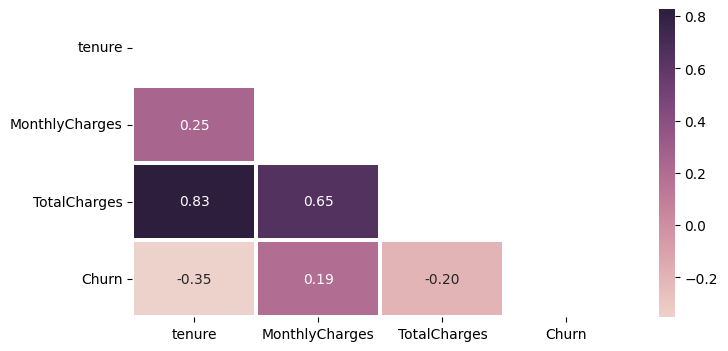

In [ ]:
df_matrix = df.copy()
df_matrix['Churn'] = df['Churn']

df_corr = df_matrix.corr()

plt.figure(figsize=(8, 4))

mask=np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)]=True

sns.heatmap(df_corr, annot=True, cmap=sns.cubehelix_palette(as_cmap=True),
            linewidths=1.5, linecolor='White',
            fmt=".2f", mask=mask)

> 계약 유지 기간과 총 납부요금은 약한 음의 상관관계를 보인다. 두 값이 커질수록 이탈이 감소한단 것을 의미하며 당연한 결과인 것 같다.

> 월 납부요금과는 약한 양의 상관관계를 보인다. 월 요금이 비쌀수록 이탈률이 증가한다는 것을 의미한다.

> 이탈률과 강한 상관관계를 나타내는 변수는 없지만 그나마 계약 유지 기간이 의미가 있어보인다. 또한 tenure과 TotalCharges, TotalCharges와 MonthlyCharges 간의 다중 공선성이 의심되므로 확인 후 TotalCharges는 제거해주도록 한다.

### 범주형 변수(1)

In [13]:
nunique = df.nunique()
category_col = nunique[nunique < 5]

category_col_name = category_col.index.tolist()

print(len(category_col_name))
category_col_name

17


['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

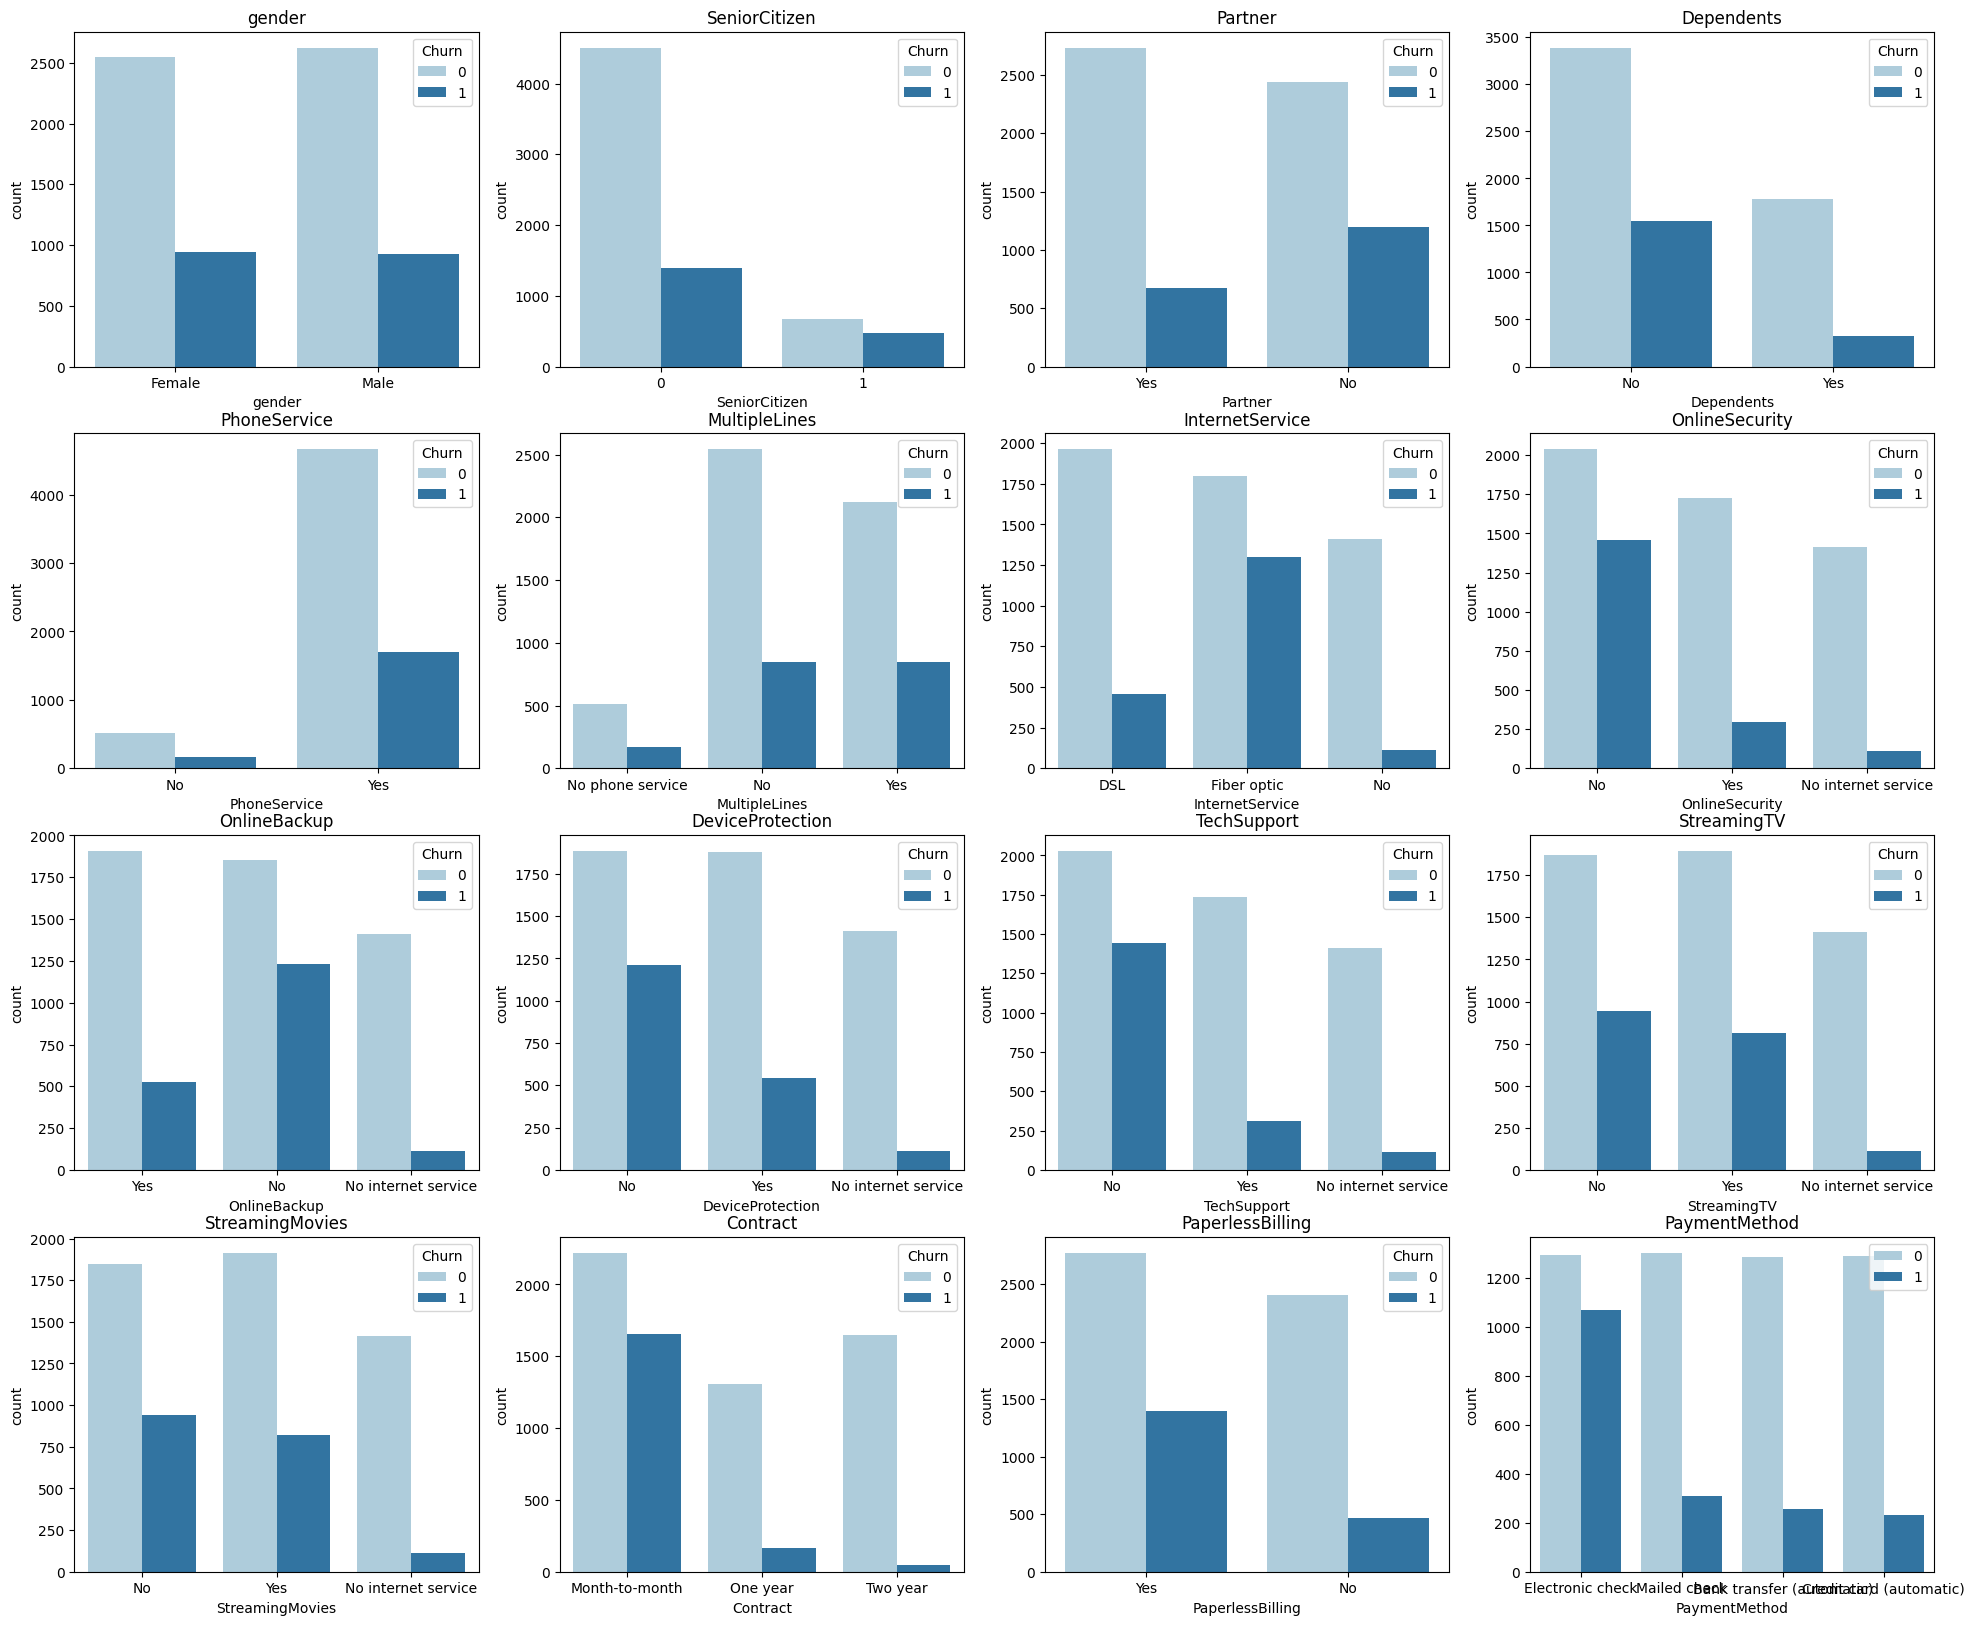

In [14]:
df_cat = df[category_col_name].copy()

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 20))

colors = []
colors.append(sns.color_palette('Paired')[0])
colors.append(sns.color_palette('Paired')[1])

for i, col_name in enumerate(category_col_name[:-1]):
  row = i // 4
  col = i % 4
  sns.countplot(data=df, x=col_name, hue='Churn', ax=axes[row][col], palette=colors)
  axes[row][col].set_title(col_name) # 각 그래프마다 제목 달기

plt.legend() # 범례표시

#### Think


SeniorCitizen: 노년층 고객의 이탈률이 젊은층 고객보다 비율상 많아 보인다.
> 노년층 이탈/비이탈 집단의 차이를 알아보도록 한다. <br><br> 또한 젊은층의 고객이 상대적으로 많은 것으로 보아 노년층 타겟의 홍보가 추후 필요하지 않을까?

<br>

Partner: 배우자가 없는 고객의 이탈률이 더 높다.
<br>
Dependents: 부양가족이 없는 집단의 이탈률이 더 높다.
> 1인 가구인 고객들의 이탈률이 높은 것으로 보인다. <br><br>추후 1인 가구를 위한 프로모션을 진행하는 등 마케팅 전략이 필요하지 않을까?

<br>

PhoneService: 폰서비스를 이용하는 고객들의 이탈률이 높아 보인다.
<br>
InternetService: 인터넷 서비스 중 Fiber optic을 이용한 고객들의 이탈률이 눈에 띄게 높다.
> Fiber optic 서비스의 문제점이 무엇인지 찾고 추후 개선의 필요성이 느껴진다.

<br>

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport: 네가지 특성 전부 신청하지 않은 고객들의 이탈률이 높다.
>

<br>

Contract: 한달 계약 고객들의 이탈률이 눈에 띄게 높다.
> 계약 기간이 중요한 변수처럼 느껴진다. 계약 기간별로 다양한 분석을 진행하도록 한다.

<br>

PaperlessBilling: 종이 청구서를 받지 않는 고객의 이탈률이 높아 보인다.
<br>
PaymentMethod: Electronic check mailed 납부 방식을 선택한 고객들의 이탈률이 가장 높다.
> 해당 납부 방식의 불편함이 존재하는지 알아볼 필요성이 느껴진다. 또한 PaperlessBilling과 함께 분석해보도록 한다.

<br>

---

<br>

이탈과 무관해 보이는 특성들
> gender, MultipleLine, StreamingTV, StreamingMovies <br> 학습 시 제외를 염두에 두도록 한다.

### 범주형 변수(2)

#### 노년층 이탈/비이탈 집단의 차이

In [ ]:
df_senior = df[df['SeniorCitizen']=='1'].copy()
print(len(df_senior))

churn_no = df_senior[df_senior['Churn']==0]
churn_yes = df_senior[df_senior['Churn']==1]

1142


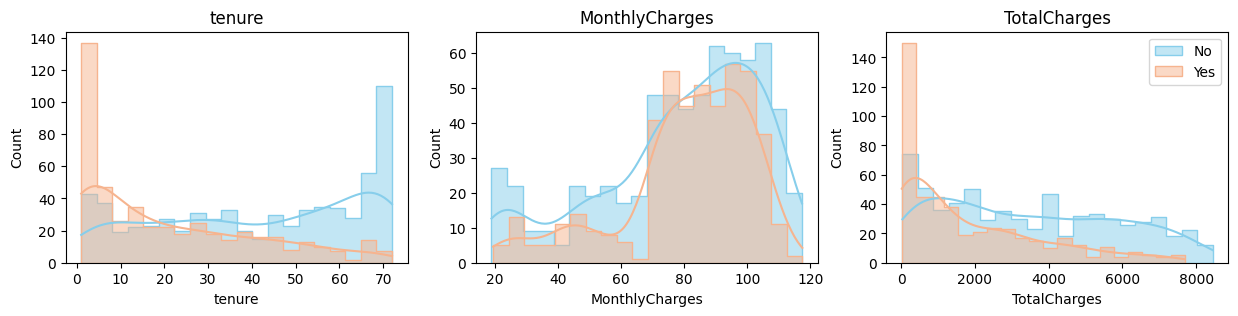

In [ ]:
col_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

color = sns.color_palette("rocket") # 색상 팔레트 가져오기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

for i, col_name in enumerate(col_list):
  sns.histplot(churn_no[col_name], ax=axes[i], color='Skyblue',
               label='No', bins=20, kde=True, element="step")
  sns.histplot(churn_yes[col_name], ax=axes[i], color=color[5],
               label='Yes', bins=20, kde=True, element="step")
  axes[i].set_title(col_name) # 각 그래프마다 제목 달기

plt.legend() # 범례표시

> 계약 기간을 보면 이탈/비이탈 집단의 분포가 거의 정확히 반대 양상을 띈다.

> 월 요금은 큰 의미가 없어 보인다,

5901


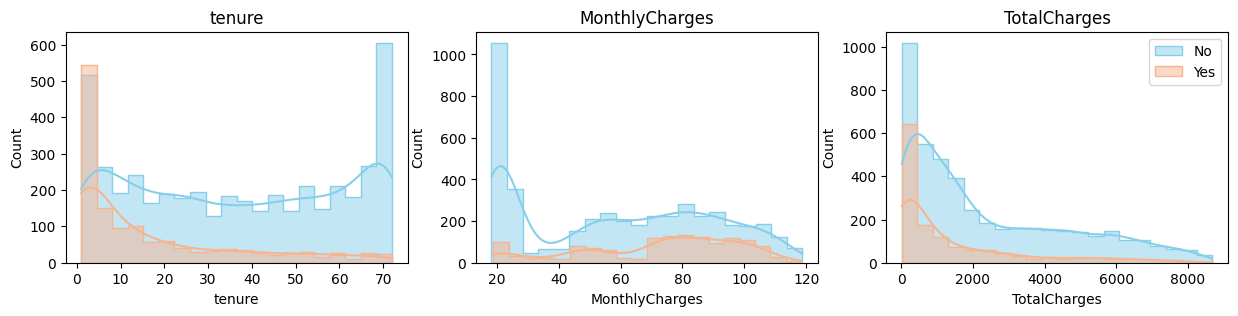

In [ ]:
df_0 = df[df['SeniorCitizen']=='0'].copy()
print(len(df_0))

churn_no = df_0[df_0['Churn']==0]
churn_yes = df_0[df_0['Churn']==1]

col_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

color = sns.color_palette("rocket") # 색상 팔레트 가져오기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

for i, col_name in enumerate(col_list):
  sns.histplot(churn_no[col_name], ax=axes[i], color='Skyblue',
               label='No', bins=20, kde=True, element="step")
  sns.histplot(churn_yes[col_name], ax=axes[i], color=color[5],
               label='Yes', bins=20, kde=True, element="step")
  axes[i].set_title(col_name) # 각 그래프마다 제목 달기

plt.legend() # 범례표시

#### 계약 기간별 분석

In [ ]:
df_month = df[df['Contract']=='Month-to-month'].copy()
print(len(df_month))

churn_no = df_month[df_month['Churn']==0]
churn_yes = df_month[df_month['Churn']==1]

3875


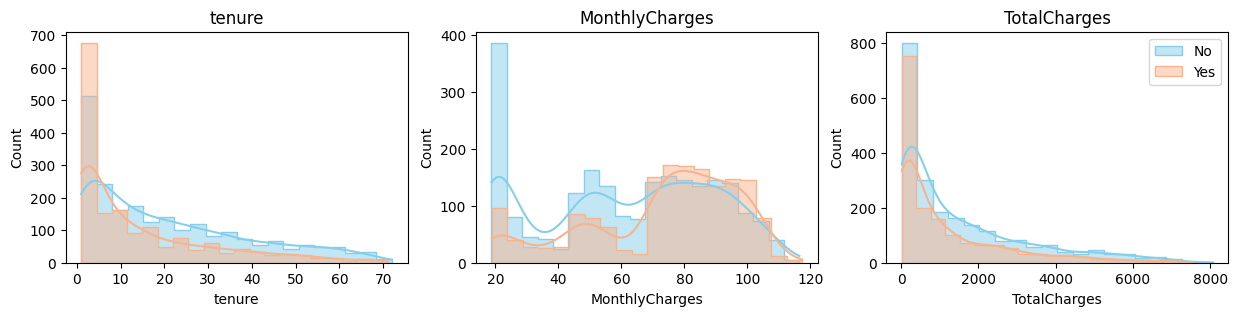

In [ ]:
col_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

color = sns.color_palette("rocket") # 색상 팔레트 가져오기
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))

for i, col_name in enumerate(col_list):
  sns.histplot(churn_no[col_name], ax=axes[i], color='Skyblue',
               label='No', bins=20, kde=True, element="step")
  sns.histplot(churn_yes[col_name], ax=axes[i], color=color[5],
               label='Yes', bins=20, kde=True, element="step")
  axes[i].set_title(col_name) # 각 그래프마다 제목 달기

plt.legend() # 범례표시

> 계약 기간이 한달인 고객들은 이탈/비이탈 분포가 거의 일차함을 알 수 있다.

> 이건어떻게 해석핼 수 있을까..?

## (3) 수치형 변수 범주화

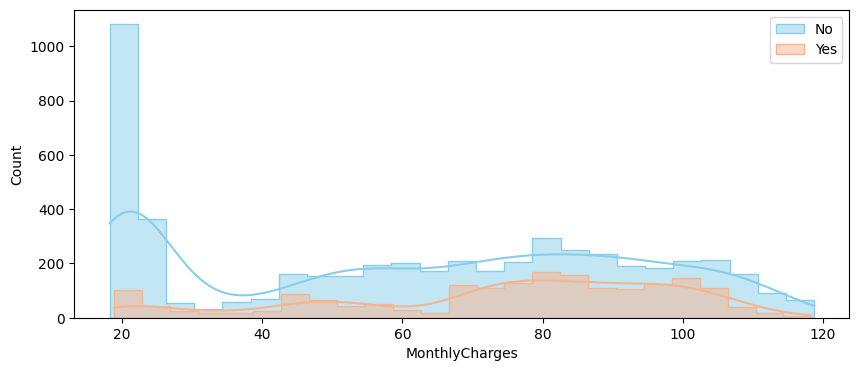

In [15]:
df_no = df[df['Churn']==0]
df_yes = df[df['Churn']==1]

plt.figure(figsize=(10, 4))

color = sns.color_palette("rocket") # 색상 팔레트 가져오기

sns.histplot(df_no['MonthlyCharges'], color='Skyblue',
              label='No', bins=25, kde=True, element="step")
sns.histplot(df_yes['MonthlyCharges'], color=color[5],
              label='Yes', bins=25, kde=True, element="step")

plt.legend()

> 범주화 기준 <br> **0 - 35 | 35 - 70 | 70 - 110 | 110 - 120**

In [16]:
df['MonthlyCharges_group'] = ''

for i in range(len(df)):
  if df['MonthlyCharges'][i] <= 35:
    df['MonthlyCharges_group'][i] = '0-35'
  elif (df['MonthlyCharges'][i] > 35) & (df['MonthlyCharges'][i] <= 70):
    df['MonthlyCharges_group'][i] = '35-70'
  elif (df['MonthlyCharges'][i] > 70) & (df['MonthlyCharges'][i] <= 110):
    df['MonthlyCharges_group'][i] = '70-110'
  else:
    df['MonthlyCharges_group'][i] = '110-120'

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_group
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-35
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,35-70
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,35-70
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,35-70
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,70-110


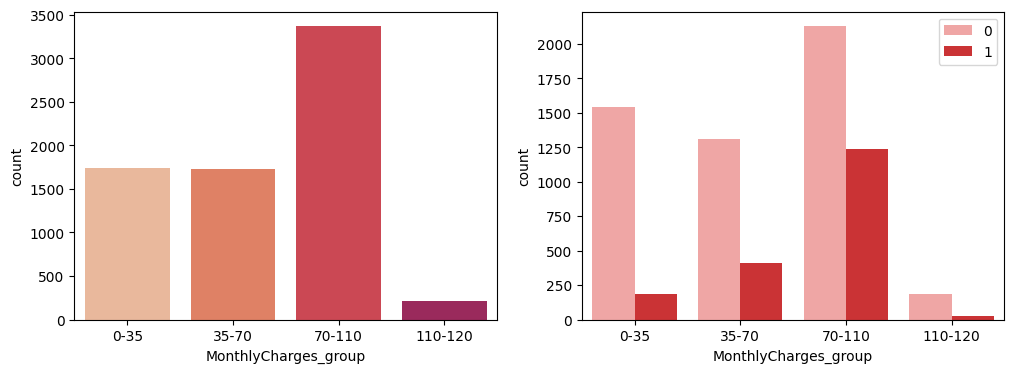

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

colors = [sns.color_palette("Paired")[4], sns.color_palette("Paired")[5]]

sns.countplot(data=df, x='MonthlyCharges_group',
              ax=axes[0], palette=sns.color_palette("rocket")[::-1])
sns.countplot(data=df, x='MonthlyCharges_group', hue='Churn',
              ax=axes[1], palette=colors)

plt.legend()

## (4) One-hot encoding

### 범주가 2개인 변수

In [19]:
# 이진분류가 가능한 특성 추출
nuniq = df.nunique()
bi_cols = nuniq[nuniq == 2].index
bi_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'Churn'],
      dtype='object')

In [20]:
# 0과 1로 변경(target 변수는 제외)
df["gender_encode"] = (df["gender"] == "Male").astype(int)
df["Partner_encode"] = (df["Partner"] == "Yes").astype(int)
df["Dependents_encode"] = (df["Dependents"] == "Yes").astype(int)
df["PhoneService_encode"] = (df["PhoneService"] == "Yes").astype(int)
df["PaperlessBilling_encode"] = (df["PaperlessBilling"] == "Yes").astype(int)

### 범주가 3개 이상인 변수

In [21]:
mul_cols = nuniq[nuniq > 2].index
mul_cols

Index(['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'MonthlyCharges_group'],
      dtype='object')

In [22]:
# 수치형 변수를 제외한 범주가 3개 이상인 변수들 저장
# gender, MultipleLine, StreamingTV, StreamingMovies 제외
mul_list = ['InternetService', 'MonthlyCharges_group']

In [23]:
# 범주가 3개 이상이지만 하나의 경우에만 큰 영향을 미친다고 판단되는 특성들은 2진변수로 변환
df["PaymentMethod_encode"] = (df["PaymentMethod"] == "Electronic check").astype(int)
df["Contract_encode"] = (df["Contract"] == "Month-to-month").astype(int)
df["OnlineSecurity_encode"] = (df["OnlineSecurity"] == "Yes").astype(int)
df["OnlineBackup_encode"] = (df["OnlineBackup"] == "Yes").astype(int)
df["DeviceProtection_encode"] = (df["DeviceProtection"] == "Yes").astype(int)
df["TechSupport_encode"] = (df["TechSupport"] == "Yes").astype(int)

In [24]:
for col_name in mul_list:
  print(col_name, df[col_name].unique())

InternetService ['DSL' 'Fiber optic' 'No']
MonthlyCharges_group ['0-35' '35-70' '70-110' '110-120']


In [25]:
df_dumm = pd.get_dummies(df, columns=mul_list)
df_dumm.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,OnlineBackup_encode,DeviceProtection_encode,TechSupport_encode,InternetService_DSL,InternetService_Fiber optic,InternetService_No,MonthlyCharges_group_0-35,MonthlyCharges_group_110-120,MonthlyCharges_group_35-70,MonthlyCharges_group_70-110
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,...,1,0,0,1,0,0,1,0,0,0
5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,Yes,...,0,1,0,1,0,0,0,0,1,0


## (5) 수치형 변수 정규화

In [29]:
df_dumm['tenure_log'] = np.log(df_dumm['tenure'])
df_dumm['MonthlyCharges_log'] = np.log(df_dumm['MonthlyCharges'])
df_dumm['TotalCharges_log'] = np.log(df_dumm['TotalCharges'])

In [85]:
from sklearn.preprocessing import MinMaxScaler

clo_list = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
scaler.fit(df_dumm[clo_list])
scale_fit = scaler.transform(df_dumm[clo_list])
scale_fit

array([[0.        , 0.11542289, 0.0012751 ],
       [0.46478873, 0.38507463, 0.21586661],
       [0.01408451, 0.35422886, 0.01031041],
       ...,
       [0.14084507, 0.11293532, 0.03780868],
       [0.04225352, 0.55870647, 0.03321025],
       [0.91549296, 0.86965174, 0.78764136]])

In [88]:
df_dumm[['tenure_mm', 'MonthlyCharges_mm', 'TotalCharges_mm']] = scale_fit
df_dumm[['tenure_mm', 'MonthlyCharges_mm', 'TotalCharges_mm']].head(2)

,tenure_mm,MonthlyCharges_mm,TotalCharges_mm
customerID,,,
7590-VHVEG,0.000000,0.115423,0.001275
5575-GNVDE,0.464789,0.385075,0.215867


### 전처리 데이터 저장

In [30]:
df_dumm.to_csv('/content/gdrive/MyDrive/coaching_study/study/data/processing_data.csv')

# 데이터셋 만들기

In [89]:
df_dumm.columns[20:]

Index(['Partner_encode', 'Dependents_encode', 'PhoneService_encode',
       'PaperlessBilling_encode', 'PaymentMethod_encode', 'Contract_encode',
       'OnlineSecurity_encode', 'OnlineBackup_encode',
       'DeviceProtection_encode', 'TechSupport_encode', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'MonthlyCharges_group_0-35', 'MonthlyCharges_group_110-120',
       'MonthlyCharges_group_35-70', 'MonthlyCharges_group_70-110',
       'tenure_log', 'MonthlyCharges_log', 'TotalCharges_log', 'tenure_mm',
       'MonthlyCharges_mm', 'TotalCharges_mm'],
      dtype='object')

In [90]:
from sklearn.model_selection import train_test_split

# col = ['tenure_log', 'MonthlyCharges_log', 'TotalCharges_log']
col = ['tenure_mm', 'MonthlyCharges_mm', 'TotalCharges_mm']

feature_names = df_dumm.columns.tolist()[20:-10]
feature_names.extend(col)

X = df_dumm[feature_names]
y = df_dumm['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 16), (1409, 16), (5634,), (1409,))

# 모델 학습

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score

## (1) DecisionTreeClassifier

> max_depth=4, max_features=0.5 -> **Accuracy: 79.21%**

In [36]:
for max_depth in range(3, 13):
  model = DecisionTreeClassifier(max_depth=max_depth, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'max_depth: {max_depth} -> Accuracy: {round(acc, 2)}%')

max_depth: 3 -> Accuracy: 78.21%
max_depth: 4 -> Accuracy: 79.35%
max_depth: 5 -> Accuracy: 79.91%
max_depth: 6 -> Accuracy: 78.64%
max_depth: 7 -> Accuracy: 78.14%
max_depth: 8 -> Accuracy: 77.36%
max_depth: 9 -> Accuracy: 74.52%
max_depth: 10 -> Accuracy: 74.59%
max_depth: 11 -> Accuracy: 73.46%
max_depth: 12 -> Accuracy: 72.96%


In [37]:
model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth':range(2, 13),
              'max_features':[0.2, 0.3, 0.5, 0.7, 0.9, 1.0]}

grid_model = GridSearchCV(model, param_grid=param_grid, cv=5, verbose=1)
grid_model.fit(X_train, y_train)

pred = grid_model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Fitting 5 folds for each of 66 candidates, totalling 330 fits
Accuracy: 78.21%


In [38]:
print(grid_model.best_params_)
print(grid_model.best_score_)
print(grid_model.best_estimator_)

{'max_depth': 3, 'max_features': 0.9}
0.7882491910966255
DecisionTreeClassifier(max_depth=3, max_features=0.9, random_state=42)


In [39]:
model = DecisionTreeClassifier(max_depth=4, max_features=0.5, random_state=42).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Accuracy: 79.21%


<Axes: >

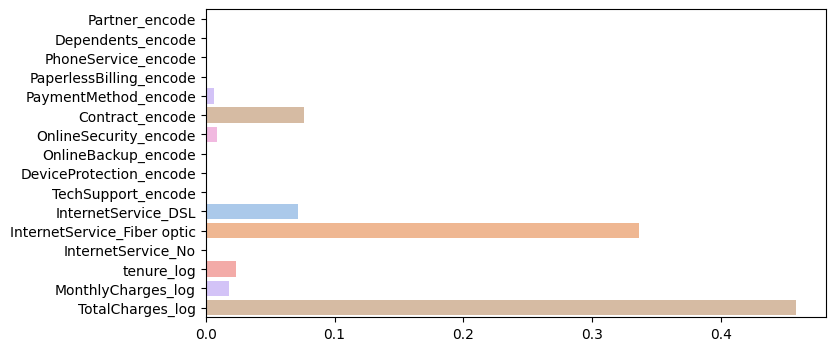

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(x=model.feature_importances_, y=feature_names, palette=sns.color_palette('pastel'))

## (2) RandomForest

> max_depth=6, n_estimators=100 -> **Accuracy: 80.91%**

> 수치형 변수 정규화 진행: max_depth=9, n_estimators=100 -> **Accuracy: 81.12%**

In [91]:
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Accuracy: 78.14%


In [42]:
for estimator in range(10, 110, 10):
  model = RandomForestClassifier(n_estimators=estimator, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'estimator: {estimator} -> Accuracy: {round(acc, 2)}%')

estimator: 10 -> Accuracy: 77.5%
estimator: 20 -> Accuracy: 78.07%
estimator: 30 -> Accuracy: 78.78%
estimator: 40 -> Accuracy: 78.78%
estimator: 50 -> Accuracy: 78.64%
estimator: 60 -> Accuracy: 78.57%
estimator: 70 -> Accuracy: 78.28%
estimator: 80 -> Accuracy: 78.35%
estimator: 90 -> Accuracy: 78.21%
estimator: 100 -> Accuracy: 78.28%


In [93]:
for max_depth in range(3, 13):
  model = RandomForestClassifier(max_depth=max_depth, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'max_depth: {max_depth} -> Accuracy: {round(acc, 2)}%')

max_depth: 3 -> Accuracy: 77.86%
max_depth: 4 -> Accuracy: 78.99%
max_depth: 5 -> Accuracy: 79.13%
max_depth: 6 -> Accuracy: 80.7%
max_depth: 7 -> Accuracy: 80.27%
max_depth: 8 -> Accuracy: 80.34%
max_depth: 9 -> Accuracy: 81.12%
max_depth: 10 -> Accuracy: 80.41%
max_depth: 11 -> Accuracy: 79.56%
max_depth: 12 -> Accuracy: 79.56%


In [92]:
model = RandomForestClassifier(max_depth=9, n_estimators=100, random_state=42).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Accuracy: 81.12%


<Axes: >

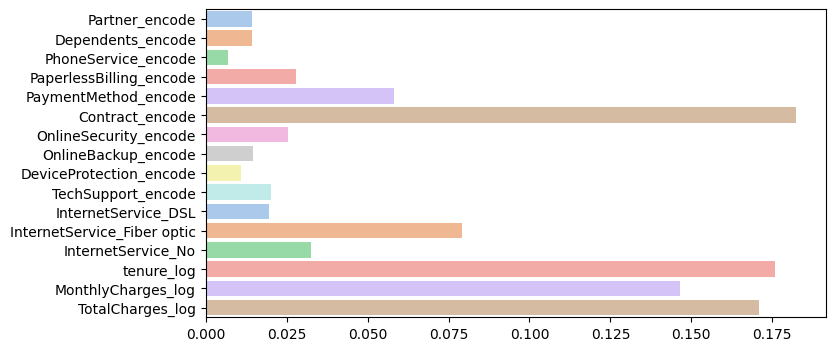

In [46]:
plt.figure(figsize=(8, 4))
sns.barplot(x=model.feature_importances_, y=feature_names, palette=sns.color_palette('pastel'))

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



Text(70.72222222222221, 0.5, 'True Label')

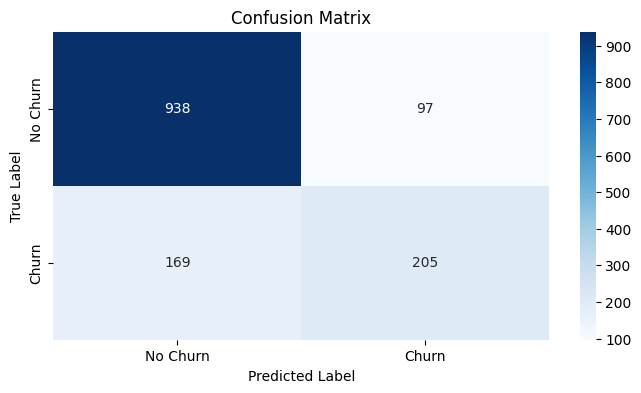

In [50]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

## (3) Boosting

> max_depth=3, max_features=0.4 -> **Accuracy: 80.06%**

> 수치형 변수 정규화 진행: max_depth=3, max_features=0.2, n_estimators=100 -> **Accuracy: 80.27%**

In [51]:
for estimator in range(10, 110, 10):
  model = GradientBoostingClassifier(n_estimators=estimator, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'estimator: {estimator} -> Accuracy: {round(acc, 2)}%')

estimator: 10 -> Accuracy: 77.79%
estimator: 20 -> Accuracy: 78.99%
estimator: 30 -> Accuracy: 79.28%
estimator: 40 -> Accuracy: 79.28%
estimator: 50 -> Accuracy: 79.35%
estimator: 60 -> Accuracy: 79.56%
estimator: 70 -> Accuracy: 79.99%
estimator: 80 -> Accuracy: 79.99%
estimator: 90 -> Accuracy: 80.13%
estimator: 100 -> Accuracy: 80.13%


In [52]:
for max_depth in range(3, 13):
  model = RandomForestClassifier(max_depth=max_depth, max_features=0.5, n_estimators=100, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'max_depth: {max_depth} -> Accuracy: {round(acc, 2)}%')

max_depth: 3 -> Accuracy: 78.71%
max_depth: 4 -> Accuracy: 79.21%
max_depth: 5 -> Accuracy: 80.13%
max_depth: 6 -> Accuracy: 80.13%
max_depth: 7 -> Accuracy: 80.06%
max_depth: 8 -> Accuracy: 80.13%
max_depth: 9 -> Accuracy: 79.7%
max_depth: 10 -> Accuracy: 78.64%
max_depth: 11 -> Accuracy: 78.78%
max_depth: 12 -> Accuracy: 78.28%


In [68]:
model = GradientBoostingClassifier(max_depth=3, max_features=0.2, n_estimators=100, random_state=42).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

# max_depth=3, max_features=0.4, n_estimators=90 -> Accuracy: 80.06%

Accuracy: 80.27%


## (4) RandomizedSearchCV로 여러 알고리즘 비교

> GradientBoostingClassifier가 가장 성능이 좋음

In [100]:
estimators = [DecisionTreeClassifier(random_state=42),
              RandomForestClassifier(random_state=42),
              GradientBoostingClassifier(random_state=42)]

max_depth = np.random.randint(3, 10, 5)
max_features = np.random.uniform(0.2, 1.0, 10)

param_distributions = {'max_depth':max_depth, 'max_features':max_features}

results = []

for estimator in estimators:
  result = []

  model_clf = RandomizedSearchCV(estimator, param_distributions=param_distributions,
                                 n_iter=10, scoring='accuracy', cv=5, verbose=1)
  model_clf.fit(X_train, y_train)

  result.append(estimator.__class__.__name__)
  result.append(model_clf.best_params_)
  result.append(model_clf.best_score_)
  result.append(model_clf.score(X_test, y_test))
  result.append(model_clf.cv_results_)
  results.append(result)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [ ]:
n_iter = pd.DataFrame(results,
                      columns=['estimator', 'best_params', 'best_score', 'score', 'cv_results'])
n_iter

,estimator,best_params,best_score,score,cv_results
0,DecisionTreeClassifier,"{'max_features': 0.9988816564434317, 'max_dept...",0.787894,0.782115,"{'mean_fit_time': [0.012844038009643555, 0.012..."
1,RandomForestClassifier,"{'max_features': 0.5257569813594771, 'max_dept...",0.799252,0.801278,"{'mean_fit_time': [1.140255832672119, 0.484401..."
2,GradientBoostingClassifier,"{'max_features': 0.6529260959882881, 'max_dept...",0.802623,0.799858,"{'mean_fit_time': [2.06392765045166, 0.7140321..."


In [ ]:
pd.DataFrame(n_iter.loc[2, 'cv_results']).sort_values(by='rank_test_score').head(5)

# max_features의 범위를 0.2~0.8 / max_depth의 범위는 5~10 정도로 두고 학습시키면 좋을 듯 하다

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.459045,0.003349,0.005151,0.000125,0.652926,3,"{'max_features': 0.6529260959882881, 'max_dept...",0.822538,0.808341,0.812777,0.786158,0.783304,0.802623,0.015341,1
5,0.519670,0.053912,0.007600,0.000036,0.231638,6,"{'max_features': 0.2316382639446836, 'max_dept...",0.803017,0.810115,0.806566,0.776398,0.776199,0.794459,0.014997,2
7,0.609677,0.016278,0.007379,0.000190,0.325483,6,"{'max_features': 0.3254833172052896, 'max_dept...",0.805679,0.797693,0.803904,0.778172,0.778863,0.792862,0.012011,3
3,1.787937,0.839516,0.010304,0.006311,0.998882,6,"{'max_features': 0.9988816564434317, 'max_dept...",0.808341,0.794144,0.792369,0.774623,0.778863,0.789668,0.011992,4
1,0.714032,0.108046,0.007080,0.000069,0.425773,6,"{'max_features': 0.425773385642628, 'max_depth...",0.805679,0.803017,0.800355,0.770186,0.766430,0.789133,0.017128,5


## (5) XGBoost

> max_depth=3, max_features=0.2, learning_rate=0.1 -> **Accuracy: 80.27%**

In [69]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance, plot_tree

In [94]:
model = XGBClassifier(learning_rate=0.1, max_depth=5, max_features=0.3,
                      random_state=42).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Accuracy: 79.42%


In [96]:
for max_depth in range(3, 11):
  model = XGBClassifier(max_depth=max_depth, learning_rate=0.1,
                        max_features=0.2, random_state=42).fit(X_train, y_train)

  pred = model.predict(X_test)
  acc = accuracy_score(pred, y_test) * 100

  print(f'max_depth: {max_depth} -> Accuracy: {round(acc, 2)}%')

max_depth: 3 -> Accuracy: 80.27%
max_depth: 4 -> Accuracy: 79.99%
max_depth: 5 -> Accuracy: 79.42%
max_depth: 6 -> Accuracy: 79.77%
max_depth: 7 -> Accuracy: 79.49%
max_depth: 8 -> Accuracy: 78.64%
max_depth: 9 -> Accuracy: 78.92%
max_depth: 10 -> Accuracy: 78.14%


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

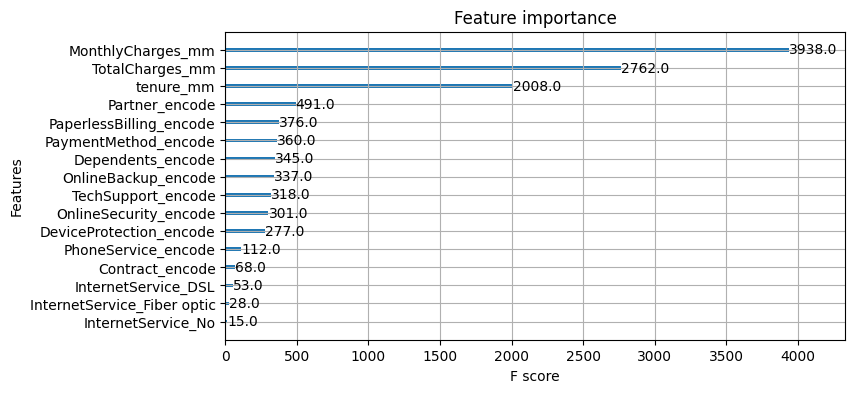

In [97]:
_, ax = plt.subplots(figsize=(8, 4))
plot_importance(model, ax=ax)

In [98]:
model = XGBClassifier(random_state=42, max_depth=3, max_features=0.2, learning_rate=0.1).fit(X_train, y_train)

pred = model.predict(X_test)

acc = accuracy_score(pred, y_test) * 100
print(f'Accuracy: {round(acc, 2)}%')

Accuracy: 80.27%


In [99]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



Text(70.72222222222221, 0.5, 'True Label')

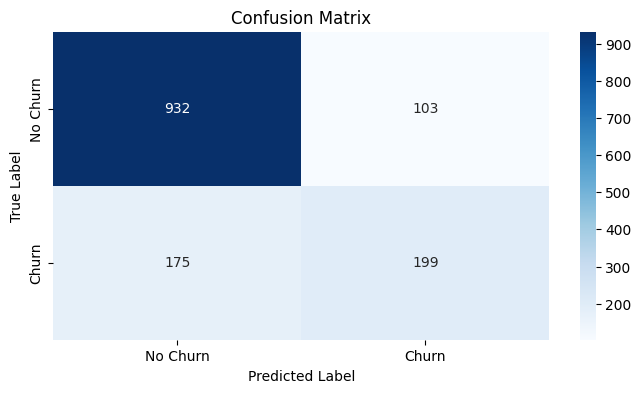

In [75]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 4))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# 마무리

RandomForest가 가장 좋은 성능을 보여줌
> max_depth=6, n_estimators=100 -> **Accuracy: 80.91%**

```
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.52      0.59       374

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409
```


정규화 진행 후, RandomForest가 여전히 가장 좋은 성능 유지
> max_depth=9, n_estimators=100 -> **Accuracy: 81.12%**

```
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1035
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409
```


> 이탈하지 않을 고객 예측을 더 잘하는 듯 하다.